In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 1e-5
    dataset = 'webcam'
    pretrain = True
    epochs = 500
    n_shots = 1


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_train, dataloader_test = get_mnist(args)
    n_classes = 10
else:
    dataloader_train, dataloader_test = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_train, dataloader_test, n_classes)

In [4]:
if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            mu, log_var = model.encode(img)
            z_l = model.reparameterize(mu, log_var)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks, dataset):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,10))

    cmap = plt.get_cmap('jet', 31)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    plt.savefig('weights/vade_tsne_{}'.format(dataset))

    plt.show()

In [5]:
vade.train()

Training VaDE...
Testing VaDE... Epoch: -1, Loss: 308.618896484375, Acc: 63.44086021505376


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training VaDE... Epoch: 0, Loss: 308.34686279296875, Acc: 72.40003360215054
Testing VaDE... Epoch: 0, Loss: 307.4383850097656, Acc: 66.66666666666666
Training VaDE... Epoch: 1, Loss: 307.5605163574219, Acc: 71.32476478494624
Testing VaDE... Epoch: 1, Loss: 306.2760009765625, Acc: 67.74193548387096
Training VaDE... Epoch: 2, Loss: 305.92552185058594, Acc: 74.76898521505376
Testing VaDE... Epoch: 2, Loss: 304.3532409667969, Acc: 73.11827956989248
Training VaDE... Epoch: 3, Loss: 304.93162027994794, Acc: 73.54670698924731
Testing VaDE... Epoch: 3, Loss: 304.1753234863281, Acc: 67.74193548387096
Training VaDE... Epoch: 4, Loss: 304.23902893066406, Acc: 72.90406586021506
Testing VaDE... Epoch: 4, Loss: 305.01385498046875, Acc: 67.74193548387096
Training VaDE... Epoch: 5, Loss: 303.6025695800781, Acc: 73.92893145161291
Testing VaDE... Epoch: 5, Loss: 302.731201171875, Acc: 74.19354838709677
Training VaDE... Epoch: 6, Loss: 301.5938262939453, Acc: 76.20967741935483
Testing VaDE... Epoch: 6, L

Testing VaDE... Epoch: 54, Loss: 293.49237060546875, Acc: 77.41935483870968
Training VaDE... Epoch: 55, Loss: 289.6198374430339, Acc: 79.97731854838709
Testing VaDE... Epoch: 55, Loss: 296.4156494140625, Acc: 68.81720430107528
Training VaDE... Epoch: 56, Loss: 288.8800455729167, Acc: 81.5482190860215
Testing VaDE... Epoch: 56, Loss: 293.2545166015625, Acc: 76.34408602150538
Training VaDE... Epoch: 57, Loss: 290.2449595133464, Acc: 79.16246639784946
Testing VaDE... Epoch: 57, Loss: 295.5655822753906, Acc: 67.74193548387096
Training VaDE... Epoch: 58, Loss: 289.668950398763, Acc: 80.89717741935483
Testing VaDE... Epoch: 58, Loss: 291.0215148925781, Acc: 76.34408602150538
Training VaDE... Epoch: 59, Loss: 288.6783091227214, Acc: 79.48168682795699
Testing VaDE... Epoch: 59, Loss: 294.2149658203125, Acc: 72.04301075268818
Training VaDE... Epoch: 60, Loss: 288.3072102864583, Acc: 82.20766129032258
Testing VaDE... Epoch: 60, Loss: 292.7316589355469, Acc: 78.49462365591397
Training VaDE... Epo

Training VaDE... Epoch: 109, Loss: 286.37488810221356, Acc: 80.87197580645162
Testing VaDE... Epoch: 109, Loss: 291.3999328613281, Acc: 75.26881720430107
Training VaDE... Epoch: 110, Loss: 284.9341684977214, Acc: 83.77856182795699
Testing VaDE... Epoch: 110, Loss: 289.1019592285156, Acc: 79.56989247311827
Training VaDE... Epoch: 111, Loss: 286.2395985921224, Acc: 82.58988575268818
Testing VaDE... Epoch: 111, Loss: 290.9247741699219, Acc: 74.19354838709677
Training VaDE... Epoch: 112, Loss: 285.1064809163411, Acc: 83.52654569892474
Testing VaDE... Epoch: 112, Loss: 290.01043701171875, Acc: 79.56989247311827
Training VaDE... Epoch: 113, Loss: 284.7896728515625, Acc: 83.33753360215054
Testing VaDE... Epoch: 113, Loss: 291.6692810058594, Acc: 76.34408602150538
Training VaDE... Epoch: 114, Loss: 285.2825876871745, Acc: 83.26612903225806
Testing VaDE... Epoch: 114, Loss: 290.5709533691406, Acc: 77.41935483870968
Training VaDE... Epoch: 115, Loss: 284.8877817789714, Acc: 83.1107190860215
Test

Training VaDE... Epoch: 163, Loss: 283.80835978190106, Acc: 84.51780913978494
Testing VaDE... Epoch: 163, Loss: 287.7957458496094, Acc: 78.49462365591397
Training VaDE... Epoch: 164, Loss: 283.2798767089844, Acc: 84.03057795698925
Testing VaDE... Epoch: 164, Loss: 288.86224365234375, Acc: 79.56989247311827
Training VaDE... Epoch: 165, Loss: 284.6302744547526, Acc: 83.64835349462366
Testing VaDE... Epoch: 165, Loss: 289.65472412109375, Acc: 76.34408602150538
Training VaDE... Epoch: 166, Loss: 281.9945119222005, Acc: 85.79049059139784
Testing VaDE... Epoch: 166, Loss: 288.9913635253906, Acc: 79.56989247311827
Training VaDE... Epoch: 167, Loss: 283.2196909586589, Acc: 85.07224462365592
Testing VaDE... Epoch: 167, Loss: 292.34100341796875, Acc: 69.89247311827957
Training VaDE... Epoch: 168, Loss: 281.4297332763672, Acc: 87.06737231182797
Testing VaDE... Epoch: 168, Loss: 289.19964599609375, Acc: 75.26881720430107
Training VaDE... Epoch: 169, Loss: 283.7742513020833, Acc: 84.6732190860215
T

Testing VaDE... Epoch: 216, Loss: 289.11376953125, Acc: 75.26881720430107
Training VaDE... Epoch: 217, Loss: 281.85146077473956, Acc: 84.43800403225806
Testing VaDE... Epoch: 217, Loss: 288.22210693359375, Acc: 76.34408602150538
Training VaDE... Epoch: 218, Loss: 282.48890686035156, Acc: 86.12231182795699
Testing VaDE... Epoch: 218, Loss: 287.5573425292969, Acc: 80.64516129032258
Training VaDE... Epoch: 219, Loss: 282.7202962239583, Acc: 84.80342741935483
Testing VaDE... Epoch: 219, Loss: 290.6325378417969, Acc: 75.26881720430107
Training VaDE... Epoch: 220, Loss: 281.3047281901042, Acc: 86.00050403225806
Testing VaDE... Epoch: 220, Loss: 288.6925048828125, Acc: 78.49462365591397
Training VaDE... Epoch: 221, Loss: 282.03955078125, Acc: 85.71488575268818
Testing VaDE... Epoch: 221, Loss: 289.68487548828125, Acc: 80.64516129032258
Training VaDE... Epoch: 222, Loss: 282.97112528483075, Acc: 85.18565188172043
Testing VaDE... Epoch: 222, Loss: 287.06463623046875, Acc: 83.87096774193549
Trai

Training VaDE... Epoch: 270, Loss: 282.18613688151044, Acc: 85.4544690860215
Testing VaDE... Epoch: 270, Loss: 286.32330322265625, Acc: 81.72043010752688
Training VaDE... Epoch: 271, Loss: 282.2793884277344, Acc: 84.15238575268818
Testing VaDE... Epoch: 271, Loss: 286.98834228515625, Acc: 79.56989247311827
Training VaDE... Epoch: 272, Loss: 281.5979359944661, Acc: 86.67674731182797
Testing VaDE... Epoch: 272, Loss: 289.58001708984375, Acc: 74.19354838709677
Training VaDE... Epoch: 273, Loss: 282.3898417154948, Acc: 83.63995295698925
Testing VaDE... Epoch: 273, Loss: 289.23394775390625, Acc: 77.41935483870968
Training VaDE... Epoch: 274, Loss: 281.1300099690755, Acc: 86.78175403225806
Testing VaDE... Epoch: 274, Loss: 288.6423034667969, Acc: 78.49462365591397
Training VaDE... Epoch: 275, Loss: 281.96754455566406, Acc: 85.34106182795699
Testing VaDE... Epoch: 275, Loss: 289.5530090332031, Acc: 79.56989247311827
Training VaDE... Epoch: 276, Loss: 281.82619222005206, Acc: 86.22731854838709

Testing VaDE... Epoch: 323, Loss: 289.0846862792969, Acc: 79.56989247311827
Training VaDE... Epoch: 324, Loss: 281.1805674235026, Acc: 87.31938844086021
Testing VaDE... Epoch: 324, Loss: 288.14178466796875, Acc: 78.49462365591397
Training VaDE... Epoch: 325, Loss: 281.6395314534505, Acc: 86.1307123655914
Testing VaDE... Epoch: 325, Loss: 286.13482666015625, Acc: 80.64516129032258
Training VaDE... Epoch: 326, Loss: 280.6765899658203, Acc: 87.04217069892474
Testing VaDE... Epoch: 326, Loss: 287.7065734863281, Acc: 78.49462365591397
Training VaDE... Epoch: 327, Loss: 280.71641031901044, Acc: 86.79855510752687
Testing VaDE... Epoch: 327, Loss: 289.99114990234375, Acc: 77.41935483870968
Training VaDE... Epoch: 328, Loss: 281.8917592366536, Acc: 86.1307123655914
Testing VaDE... Epoch: 328, Loss: 286.0277099609375, Acc: 82.79569892473118
Training VaDE... Epoch: 329, Loss: 280.1035410563151, Acc: 87.04217069892474
Testing VaDE... Epoch: 329, Loss: 288.0426330566406, Acc: 78.49462365591397
Trai

Testing VaDE... Epoch: 377, Loss: 287.2515869140625, Acc: 77.41935483870968
Training VaDE... Epoch: 378, Loss: 280.1292419433594, Acc: 86.39112903225806
Testing VaDE... Epoch: 378, Loss: 289.67437744140625, Acc: 77.41935483870968
Training VaDE... Epoch: 379, Loss: 281.4101969401042, Acc: 85.82829301075269
Testing VaDE... Epoch: 379, Loss: 287.6875, Acc: 78.49462365591397
Training VaDE... Epoch: 380, Loss: 281.02019755045575, Acc: 86.37432795698925
Testing VaDE... Epoch: 380, Loss: 287.8170471191406, Acc: 78.49462365591397
Training VaDE... Epoch: 381, Loss: 281.77605692545575, Acc: 85.31586021505376
Testing VaDE... Epoch: 381, Loss: 288.8017272949219, Acc: 78.49462365591397
Training VaDE... Epoch: 382, Loss: 280.75522867838544, Acc: 86.8069556451613
Testing VaDE... Epoch: 382, Loss: 287.1498718261719, Acc: 77.41935483870968
Training VaDE... Epoch: 383, Loss: 281.2673746744792, Acc: 86.27772177419354
Testing VaDE... Epoch: 383, Loss: 287.8979797363281, Acc: 79.56989247311827
Training VaD

Testing VaDE... Epoch: 431, Loss: 287.4348449707031, Acc: 82.79569892473118
Training VaDE... Epoch: 432, Loss: 280.31382242838544, Acc: 86.39952956989248
Testing VaDE... Epoch: 432, Loss: 285.77496337890625, Acc: 80.64516129032258
Training VaDE... Epoch: 433, Loss: 279.6987813313802, Acc: 88.49126344086021
Testing VaDE... Epoch: 433, Loss: 289.8387451171875, Acc: 75.26881720430107
Training VaDE... Epoch: 434, Loss: 281.4843037923177, Acc: 86.08870967741935
Testing VaDE... Epoch: 434, Loss: 287.8187255859375, Acc: 79.56989247311827
Training VaDE... Epoch: 435, Loss: 281.31934611002606, Acc: 85.72328629032258
Testing VaDE... Epoch: 435, Loss: 287.519775390625, Acc: 79.56989247311827
Training VaDE... Epoch: 436, Loss: 280.19146728515625, Acc: 87.97043010752687
Testing VaDE... Epoch: 436, Loss: 289.475830078125, Acc: 76.34408602150538
Training VaDE... Epoch: 437, Loss: 280.85719807942706, Acc: 87.42439516129032
Testing VaDE... Epoch: 437, Loss: 289.8008728027344, Acc: 74.19354838709677
Tra

Training VaDE... Epoch: 485, Loss: 281.46702067057294, Acc: 87.1975806451613
Testing VaDE... Epoch: 485, Loss: 286.04547119140625, Acc: 83.87096774193549
Training VaDE... Epoch: 486, Loss: 281.0299835205078, Acc: 86.65154569892474
Testing VaDE... Epoch: 486, Loss: 287.0609130859375, Acc: 78.49462365591397
Training VaDE... Epoch: 487, Loss: 282.98907979329425, Acc: 84.16918682795699
Testing VaDE... Epoch: 487, Loss: 287.96795654296875, Acc: 78.49462365591397
Training VaDE... Epoch: 488, Loss: 280.9216562906901, Acc: 86.92036290322581
Testing VaDE... Epoch: 488, Loss: 286.1938781738281, Acc: 80.64516129032258
Training VaDE... Epoch: 489, Loss: 282.1300354003906, Acc: 84.79502688172043
Testing VaDE... Epoch: 489, Loss: 287.8542175292969, Acc: 78.49462365591397
Training VaDE... Epoch: 490, Loss: 280.89422607421875, Acc: 86.5213373655914
Testing VaDE... Epoch: 490, Loss: 288.7261962890625, Acc: 76.34408602150538
Training VaDE... Epoch: 491, Loss: 280.838623046875, Acc: 86.60114247311827
Tes

In [6]:
z_dim = 10
ftr_ext = vade.feature_extractor
model = vade.VaDE
z, y = get_latent_space(dataloader_train, z_dim, model, device, ftr_ext)
z, y = z.cpu(), y.cpu()
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())

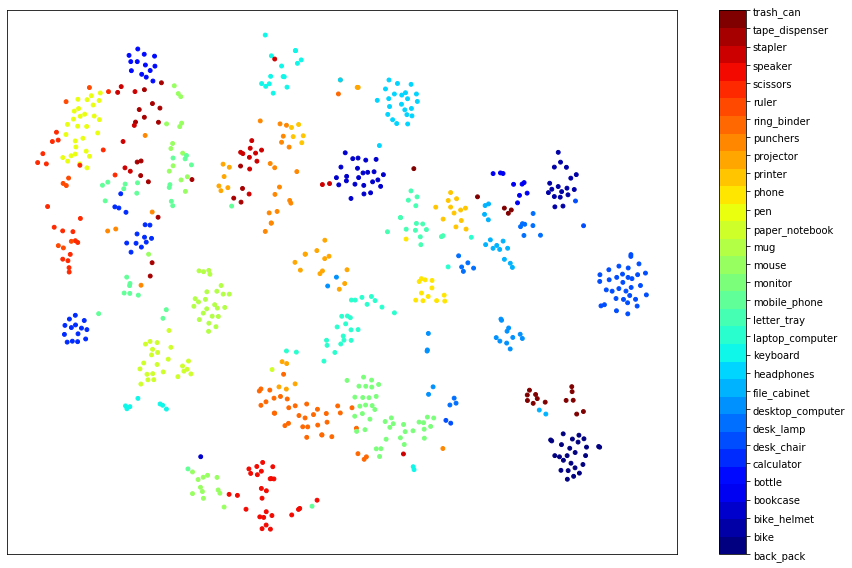

In [7]:
plot_tsne(z_embedded, y, classes, args.dataset)

In [8]:
acc = np.array(vade.acc)
acc_t = np.array(vade.acc_t)
rec = np.array(vade.rec)
rec_t = np.array(vade.rec_t)
dkl = np.array(vade.dkl)
dkl_t = np.array(vade.dkl_t)

def plot_loss(values, values_t, metric, dataset):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('VaDE {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig('weights/vade_{}_{}'.format(metric, dataset))

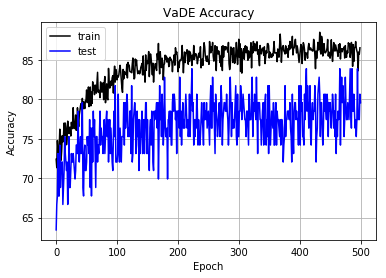

In [9]:
plot_loss(acc, acc_t, 'Accuracy', args.dataset)

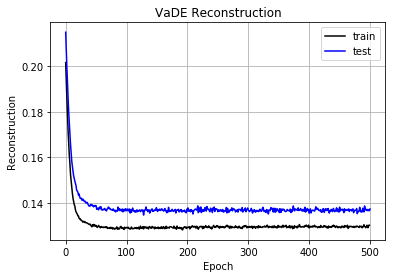

In [10]:
plot_loss(rec, rec_t, 'Reconstruction', args.dataset)

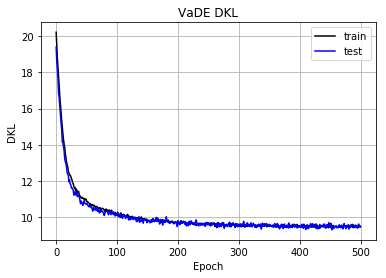

In [11]:
plot_loss(dkl, dkl_t, 'DKL', args.dataset)